## 1번: 모두의딥러닝 시즌2 강의의 longsequence 코드 lstm 모델 적용해보기.

In [1]:
import torch
import torch.optim as optim
import numpy as np

In [2]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [3]:
char_set = list(set(sentence))
char_dic = {c: i for i, c in enumerate(char_set)} #sentence에 있는 문자들을 딕셔너리 형태로 구성
char_dic

{'n': 0,
 't': 1,
 'c': 2,
 'w': 3,
 'g': 4,
 'a': 5,
 'y': 6,
 'e': 7,
 ' ': 8,
 'f': 9,
 ',': 10,
 'b': 11,
 '.': 12,
 'o': 13,
 'h': 14,
 'p': 15,
 'l': 16,
 "'": 17,
 'd': 18,
 'k': 19,
 'm': 20,
 's': 21,
 'i': 22,
 'r': 23,
 'u': 24}

In [4]:
#하이퍼파라미터 지정
dic_size = len(char_dic)
hidden_size = len(char_dic) # 포함된 문자의 수를 Hidden size로 설정
sequence_length = 10  # 문장에서 10개씩 잘라서 학습시킨다
learning_rate = 0.1
print(dic_size)

25


In [5]:
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length] # 문장을 오른쪽으로 한칸씩 이동하면서 청크로 나누는 과정
    y_str = sentence[i + 1: i + sequence_length + 1]

    x_data.append([char_dic[c] for c in x_str])  
    y_data.append([char_dic[c] for c in y_str])  # 위에서 정의한 문자 별 딕셔너리를 통해 인덱싱을 해준다

x_one_hot = [np.eye(dic_size)[x] for x in x_data] # 벡터 형태로 변환

In [6]:
print('x: ',sentence[0:0 + sequence_length])
print('y: ',sentence[1:1 + sequence_length])

x:  if you wan
y:  f you want


In [7]:
# 인덱싱을 한 리스트
x_data[0:2]

[[22, 9, 8, 6, 13, 24, 8, 3, 5, 0], [9, 8, 6, 13, 24, 8, 3, 5, 0, 1]]

In [8]:
x_one_hot[0] 

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 

In [9]:
y_data[0]

[9, 8, 6, 13, 24, 8, 3, 5, 0, 1]

In [10]:
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [11]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [12]:
net = Net(dic_size, hidden_size, 2) #layer=2기 때문에 rnn 두번 통과 이후에 FC 통과

![img1.jpg](img1.jpg)

In [13]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [14]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0: #처음 부분은 예측결과를 모두 가져옴
            predict_str += ''.join([char_set[t] for t in result])
        else: #그 다음부터 마지막 글자만 추가 
            predict_str += char_set[result[-1]]

In [15]:
print(X.shape) #batch_size,sequence length,dictionary수

torch.Size([170, 10, 25])


In [16]:
print(outputs.shape) #hidden_size와 동일하게 나온다
print(outputs.view(-1,dic_size).shape) 

torch.Size([170, 10, 25])
torch.Size([1700, 25])


In [17]:
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([170, 10])
torch.Size([1700])


In [18]:
outputs.argmax(dim=2)

tensor([[16,  8,  6,  ...,  5,  0,  1],
        [13,  6, 13,  ...,  0,  1,  8],
        [ 1, 13, 24,  ...,  1,  8,  1],
        ...,
        [ 8, 13,  9,  ...,  8, 21,  7],
        [ 1,  9,  8,  ..., 21,  7,  5],
        [ 8,  8,  1,  ...,  7,  5, 12]])

## 2번

- 18개의 언어로된 파일을 훈련시켜서, 철자에 따라 해당 이름이 어떤 언어인지 예측하는 모델

### 1) 데이터 준비

In [19]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

In [20]:
def findFiles(path): return glob.glob(path)

In [21]:
#어떤 파일이 있는지 확인, 18개의 언어 파일이 있음을 확인 
print(findFiles('data/names/*.txt'))

['data/names\\Arabic.txt', 'data/names\\Chinese.txt', 'data/names\\Czech.txt', 'data/names\\Dutch.txt', 'data/names\\English.txt', 'data/names\\French.txt', 'data/names\\German.txt', 'data/names\\Greek.txt', 'data/names\\Irish.txt', 'data/names\\Italian.txt', 'data/names\\Japanese.txt', 'data/names\\Korean.txt', 'data/names\\Polish.txt', 'data/names\\Portuguese.txt', 'data/names\\Russian.txt', 'data/names\\Scottish.txt', 'data/names\\Spanish.txt', 'data/names\\Vietnamese.txt']


In [22]:
import unicodedata
import string

In [23]:
all_letters = string.ascii_letters + " .,;'"
print(all_letters)
n_letters = len(all_letters)

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'


In [24]:
# 유니코드 문자열을 ASCII로 변환
# 유니코드: 전세계의 모든 문자를 컴퓨터에서 일관되게 다룰 수 있는 산업 표준 
# ascii: 알파벳 특수기호를 0과 1로 나타내는 체계
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

Slusarski


In [25]:
# 파일을 읽고 줄 단위로 분리
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

In [26]:
category_lines = {}
all_categories = []

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename) 
    category_lines[category] = lines
    
n_categories = len(all_categories)

In [27]:
#파일명을 chinese txt로 분리해 앞의 단어만 가져오는 방식으로 카테고리 지정
os.path.splitext(os.path.basename('data/names\\Chinese.txt'))[0]

'Chinese'

In [28]:
all_categories

['Arabic',
 'Chinese',
 'Czech',
 'Dutch',
 'English',
 'French',
 'German',
 'Greek',
 'Irish',
 'Italian',
 'Japanese',
 'Korean',
 'Polish',
 'Portuguese',
 'Russian',
 'Scottish',
 'Spanish',
 'Vietnamese']

In [29]:
#파일 안에 들어있는 내용을 한줄 한줄 읽어서 딕셔너리 형태로 가져옴
category_lines

{'Arabic': ['Khoury',
  'Nahas',
  'Daher',
  'Gerges',
  'Nazari',
  'Maalouf',
  'Gerges',
  'Naifeh',
  'Guirguis',
  'Baba',
  'Sabbagh',
  'Attia',
  'Tahan',
  'Haddad',
  'Aswad',
  'Najjar',
  'Dagher',
  'Maloof',
  'Isa',
  'Asghar',
  'Nader',
  'Gaber',
  'Abboud',
  'Maalouf',
  'Zogby',
  'Srour',
  'Bahar',
  'Mustafa',
  'Hanania',
  'Daher',
  'Tuma',
  'Nahas',
  'Saliba',
  'Shamoon',
  'Handal',
  'Baba',
  'Amari',
  'Bahar',
  'Atiyeh',
  'Said',
  'Khouri',
  'Tahan',
  'Baba',
  'Mustafa',
  'Guirguis',
  'Sleiman',
  'Seif',
  'Dagher',
  'Bahar',
  'Gaber',
  'Harb',
  'Seif',
  'Asker',
  'Nader',
  'Antar',
  'Awad',
  'Srour',
  'Shadid',
  'Hajjar',
  'Hanania',
  'Kalb',
  'Shadid',
  'Bazzi',
  'Mustafa',
  'Masih',
  'Ghanem',
  'Haddad',
  'Isa',
  'Antoun',
  'Sarraf',
  'Sleiman',
  'Dagher',
  'Najjar',
  'Malouf',
  'Nahas',
  'Naser',
  'Saliba',
  'Shamon',
  'Malouf',
  'Kalb',
  'Daher',
  'Maalouf',
  'Wasem',
  'Kanaan',
  'Naifeh',
  'Boutro

### 2) 이름을 tensor로 변경

In [30]:
import torch

# 해당 문자가 앞서 정의한 all_letters에서 몇 번째 단어에 해당하는지, 해당 문자의 index를 찾아주는 함수
def letterToIndex(letter):
    return all_letters.find(letter)

# np.eye를 사용하지 않고, 해당 문자의 인덱스 자리에 1 을 집어넣고 나머지는 0으로 채워주는 방식으로 
# one-hot 인코딩을 해줌
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor


def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [31]:
lineToTensor('Jones')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

### 3) 네트워크 생성

In [32]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

![img2.jpg](img2.jpg)
- 네트워크를 실행할 때마다 input data(현재 문자 tensor)와 이전의 hidden값을 전달해야한다. 최종적으로 각 언어의 확률(output)과 hidden상태를 return한다

In [33]:
# output에서 가장 높은 확률을 가진 언어가 무엇인지 출력하는 함수
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)  # 텐서의 가장 큰 값 및 index
    category_i = top_i.item()   # 텐서에서 정수 값으로 변경
    return all_categories[category_i], category_i

In [34]:
# 예시
input = letterToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
print(output)
print(categoryFromOutput(output))

tensor([[-2.9213, -2.8821, -3.0074, -2.8263, -2.8508, -2.8557, -2.9139, -2.8382,
         -2.8563, -2.8095, -2.9046, -2.8684, -2.8986, -2.9086, -3.0078, -2.7943,
         -3.0206, -2.8984]], grad_fn=<LogSoftmaxBackward>)
('Scottish', 15)


In [35]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)                #랜덤으로 하나의 카테고리를 선정
    line = randomChoice(category_lines[category])          #해당 카테고리에서 랜덤으로 하나의 이름 선정 
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)    
    return category, line, category_tensor, line_tensor

In [36]:
category, line, category_tensor, line_tensor = randomTrainingExample()
print('category =', category, '/ line =', line)

category = Vietnamese / line = Tron


### 4)네트워크 학습

In [45]:
criterion = nn.NLLLoss()
learning_rate = 0.005 

In [46]:
def train(category_tensor, line_tensor):
    hidden = rnn.initHidden() #hidden layer 초기화

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()
    
        # 매개변수의 경사도에 학습률을 곱해서 그 매개변수의 값에 더합니다.
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()
    


In [47]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000
current_loss = 0
all_losses = []

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample() #랜덤으로 하나 뽑아서 
    output, loss = train(category_tensor, line_tensor) # train시키고
    current_loss += loss #loss를 구한다 

    # loss와 해당 이름의 예측값 출력, 맞았는지 틀렸는지 여부 또한 출력
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print(iter, loss, line, guess, correct)

    # 1000번마다 평균 loss를 구해서 all_losses에 append해준다
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 2.8309969902038574 Unruh Russian ✗ (German)
10000 1.3116176128387451 Sung Chinese ✗ (Korean)
15000 2.3303117752075195 Basara Japanese ✗ (Arabic)
20000 1.037527322769165 Chau Vietnamese ✓
25000 2.825425148010254 Prill Irish ✗ (Czech)
30000 2.43113112449646 Herbert Dutch ✗ (French)
35000 2.4924893379211426 Adam Arabic ✗ (Irish)
40000 2.6678481101989746 Depp Dutch ✗ (English)
45000 0.0557219572365284 Totolos Greek ✓
50000 4.038259983062744 Fabian Irish ✗ (Polish)
55000 1.7168773412704468 Addario Spanish ✗ (Italian)
60000 1.2636423110961914 Sung Chinese ✗ (Korean)
65000 0.41141268610954285 Oh  Korean ✓
70000 0.47707968950271606 Jon Korean ✓
75000 0.8551546931266785 Antonino Italian ✓
80000 0.5241192579269409 Levesque French ✓
85000 0.4399840831756592 Morandi Italian ✓
90000 2.118769884109497 Chantler German ✗ (English)
95000 3.8557333946228027 Roig Chinese ✗ (Spanish)
100000 3.163757085800171 Prentice French ✗ (English)


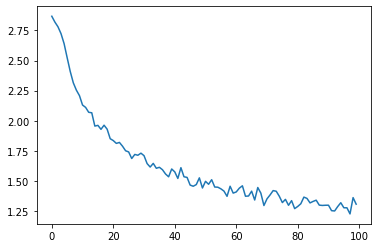

In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)